In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [2]:
import scipy

In [3]:
import pandas as pd

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [5]:
from scipy.interpolate import interp1d

In [6]:
from dvr_setup_and_plotting_utils import *

85.6992
potential written
dvr is set up


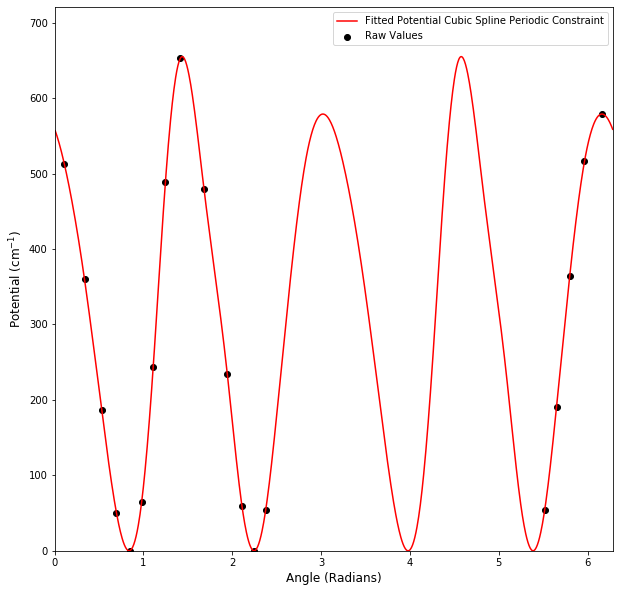

In [7]:
# Run and collect ground state

# Reduced mass of freqency calculation =  3.5708    AMU

mass_ground = 3.5708*1836*24
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500


fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)

print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_no_water_fitted.dat',
                        output_file_name='gs_scan_no_h2o')

print('dvr is set up')
# Now need to make the output potential the potential_file.dat and run 
# ./dvr_1d_periodic

In [8]:
# At this point in the directory where the files are made
# ! cp gs_scan_no_water_fitted.dat  potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


78.72919999999999
potential written
dvr is set up


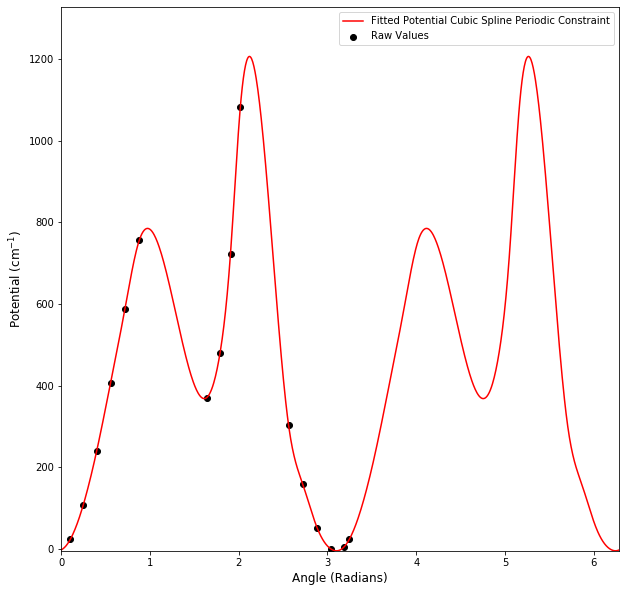

In [9]:
# run DVR
# Now run excited state

mass_excited =   3.5786*1836*22
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_no_water_fitted.dat',
                        output_file_name='es_scan_no_h2o')

print('dvr is set up')

In [10]:
# At this point in the directory where the files are made
# ! cp es_scan_no_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above

In [11]:
# Absolute value of overlaps is calculated here

In [12]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_no_h2o',
                                         excited_state_file_name_root='es_scan_no_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=3000,
                                         vib_shift=263.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 1.46500602037513e-06
Calculating overlap for transition with energy 61.791307794535456
Calculating overlap for transition with energy 61.791308384962036
Calculating overlap for transition with energy 122.83114316174638
Calculating overlap for transition with energy 122.8311437400438
Calculating overlap for transition with energy 181.2798686560484
Calculating overlap for transition with energy 181.27986911375802
Calculating overlap for transition with energy 238.0187228768423
Calculating overlap for transition with energy 238.0187229426492
Calculating overlap for transition with energy 295.57363290173674
Calculating overlap for transition with energy 295.5736330737934
Calculating overlap for transition with energy 354.7100073320443
Calculating overlap for transition with energy 354.71000821290926
Calculating overlap for transition with energy 389.72888234182903
Calculating overlap for trans

Calculating overlap for transition with energy 1094.539560535186
Calculating overlap for transition with energy 1126.8198870839094
Calculating overlap for transition with energy 1136.7718030855092
Calculating overlap for transition with energy 1162.583088289618
Calculating overlap for transition with energy 1179.8144278379218
Calculating overlap for transition with energy 1197.6798774635674
Calculating overlap for transition with energy 1223.795659221338
Calculating overlap for transition with energy 1234.461752267867
Calculating overlap for transition with energy 1268.9686946190584
Calculating overlap for transition with energy 1274.5895208938741
Calculating overlap for transition with energy 1315.5453741569058
Calculating overlap for transition with energy 1318.2505639747487
Calculating overlap for transition with energy 1363.6929254621589
Calculating overlap for transition with energy 1364.9116652525558
Calculating overlap for transition with energy 1413.532406852384
Calculating ove

Calculating overlap for transition with energy 178.62443050845138
Calculating overlap for transition with energy 178.62443096616104
Calculating overlap for transition with energy 235.3632847292453
Calculating overlap for transition with energy 235.3632847950522
Calculating overlap for transition with energy 292.91819475413973
Calculating overlap for transition with energy 292.9181949261964
Calculating overlap for transition with energy 352.0545691844473
Calculating overlap for transition with energy 352.0545700653123
Calculating overlap for transition with energy 387.073444194232
Calculating overlap for transition with energy 387.0734443108618
Calculating overlap for transition with energy 411.97059021592025
Calculating overlap for transition with energy 411.9705907849839
Calculating overlap for transition with energy 471.9243470561694
Calculating overlap for transition with energy 471.92434811750866
Calculating overlap for transition with energy 479.7384510764768
Calculating overlap f

In [13]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_no_h2o_0',
 'excited_state_id': 'es_scan_no_h2o_0',
 'overlap': 3.072325047651587e-08}

In [14]:
overlap_df = pd.DataFrame(wavefunction_overlaps)

In [15]:
# Initial spectral plots

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


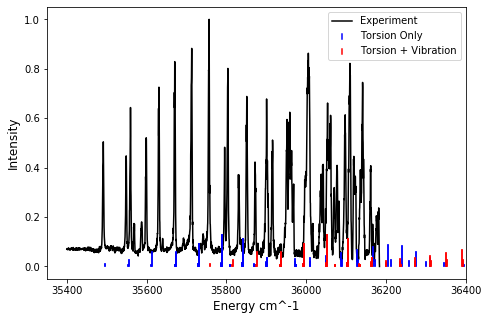

In [16]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum

offset = 35080

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36400)
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)

#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


#ax.stem(ground_vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        ground_vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='n=0 ground origin',
 #      basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_no_water_zpe_for_presentation.pdf')
plt.show()

In [17]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [18]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-100,max_freq=offset+3000,width=5.0,resolution=1.0)

In [19]:
# Plot with both spectra on each other
# Two versions, one narrow range, one wider range

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


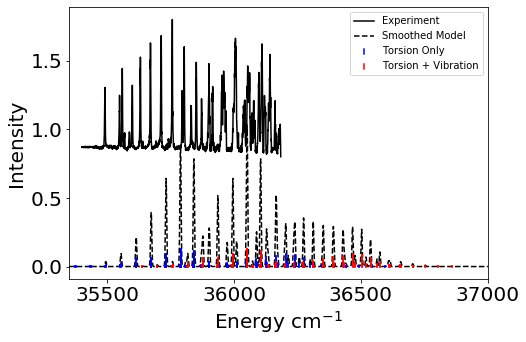

In [29]:
# Wide range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,37000)

max_freq = 38000
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_wide_range.pdf',bbox_inches='tight')
plt.show()



/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


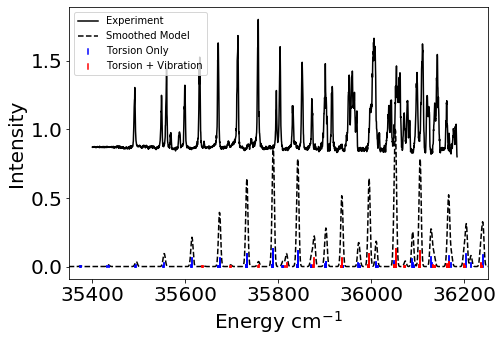

In [21]:
# Narrow Range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPy UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPy UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(35350,36250)

max_freq = 36250
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)


ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_masses_no_water_zpe_for_presentation_narrow_range.pdf',bbox_inches='tight')
plt.show()



In [22]:
# Plot the lowest 4 ground state wavefunctions
ground_state_file_name_root='gs_scan_no_h2o'
excited_state_file_name_root='es_scan_no_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [23]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_no_h2o_0


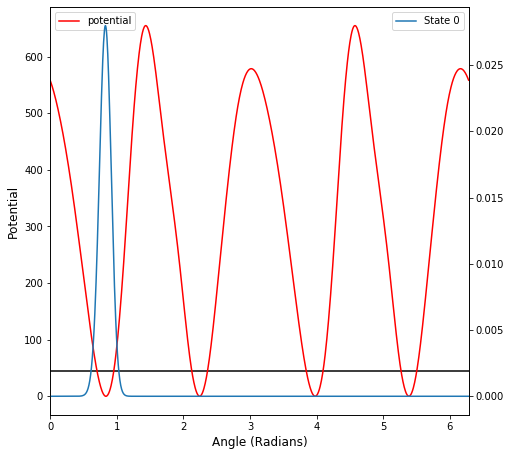

Examining state gs_scan_no_h2o_1


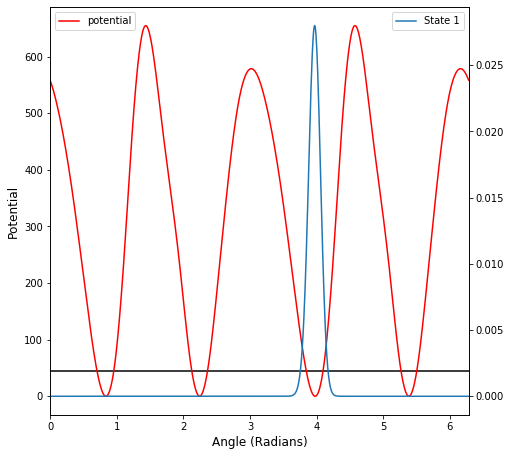

Examining state gs_scan_no_h2o_2


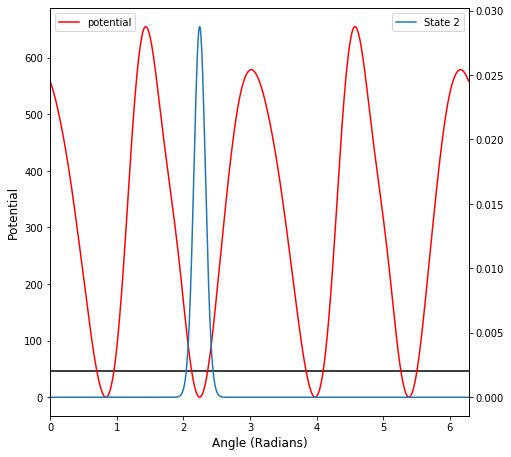

Examining state gs_scan_no_h2o_3


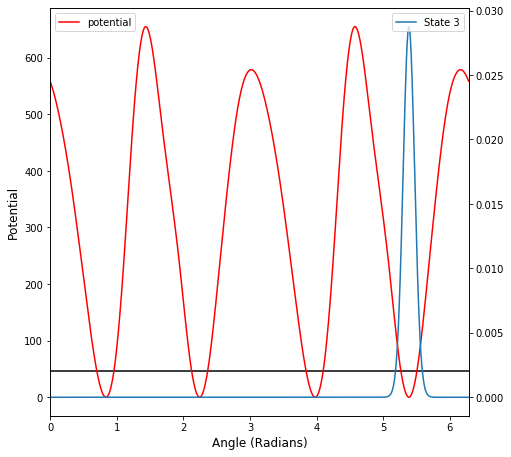

In [24]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential

wavefunction_counter = 0

max_wavefunctions = 4

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

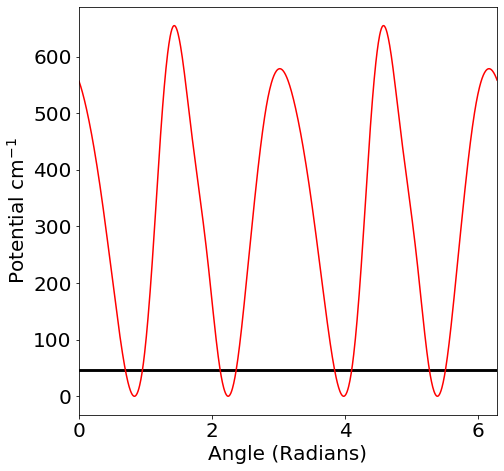

In [25]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=200)

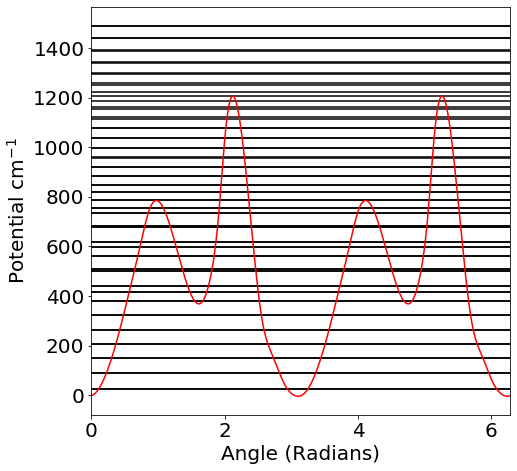

In [26]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="es_scan_no_h2o",
                      plotting_potential_name="es_scan_no_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=1500)

In [27]:
# Get maximum overlaps so we can plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(60)

,energy,ground_state_id,excited_state_id,overlap
64,0.003230,gs_scan_no_h2o_0,es_scan_no_h2o_32,0.128055
65,0.004428,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_32_vib_excited,0.128055
267,0.004428,gs_scan_no_h2o_1_vib_excited,es_scan_no_h2o_33_vib_excited,0.128053
266,0.003230,gs_scan_no_h2o_1,es_scan_no_h2o_33,0.128053
264,0.003230,gs_scan_no_h2o_1,es_scan_no_h2o_32,0.128026
265,0.004428,gs_scan_no_h2o_1_vib_excited,es_scan_no_h2o_32_vib_excited,0.128026
66,0.003230,gs_scan_no_h2o_0,es_scan_no_h2o_33,0.128024
67,0.004428,gs_scan_no_h2o_0_vib_excited,es_scan_no_h2o_33_vib_excited,0.128024
272,0.003471,gs_scan_no_h2o_1,es_scan_no_h2o_36,0.112928
273,0.004669,gs_scan_no_h2o_1_vib_excited,es_scan_no_h2o_36_vib_excited,0.112928


In [28]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_overlap_list_no_zpe.csv')